<a href="https://colab.research.google.com/github/Aryanchib/DataScience_Assignment/blob/main/A1Stats1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt      # for Boxplot and bar graph
import seaborn as sns                # for histogram
import warnings
warnings.filterwarnings('ignore')

dt=pd.read_csv("/content/sample_data/sales_data_with_discounts.csv")

dt

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


For descriptive overview we'll use .describe funtion

In [ ]:
dt.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [ ]:
dt.isnull().sum()

,0
Date,0
Day,0
SKU,0
City,0
Volume,0
BU,0
Brand,0
Model,0
Avg Price,0
Total Sales Value,0


In [ ]:
numerical_columns = dt.select_dtypes(include='number').columns
print(numerical_columns)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


**we can write df.select_dtypes(include='int').columns but this will give only int data type columns as we can see in the dataset we do have some columns in float n  int data type so we will consider taking number which will consider all the numeric columns irrespective of the float/int/etc because we want every numeric columns**

In [ ]:
dframe = pd.DataFrame({'MEAN': dt[numerical_columns].mean(),
                      'MODE': dt[numerical_columns].mode().iloc[0],
                      'MEDIAN': dt[numerical_columns].median(),
                      'STANDARD DEVIATION': dt[numerical_columns].std()}
                      )
dframe

,MEAN,MODE,MEDIAN,STANDARD DEVIATION
Volume,5.066667,3.000000,4.000000,4.231602
Avg Price,10453.433333,400.000000,1450.000000,18079.904840
Total Sales Value,33812.835556,24300.000000,5700.000000,50535.074173
Discount Rate (%),15.155242,5.007822,16.577766,4.220602
Discount Amount,3346.499424,69.177942,988.933733,4509.902963
Net Sales Value,30466.336131,326.974801,4677.788059,46358.656624


The .mode() method can return multiple modes for a column. iloc[0] is used to select only the first mode for each column to ensure compatibility with the DataFrame structure

**In descriptive statistics, a box plot or boxplot (also known as a box and whisker plot) is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and skewness by displaying the data quartiles (or percentiles) and averages.**

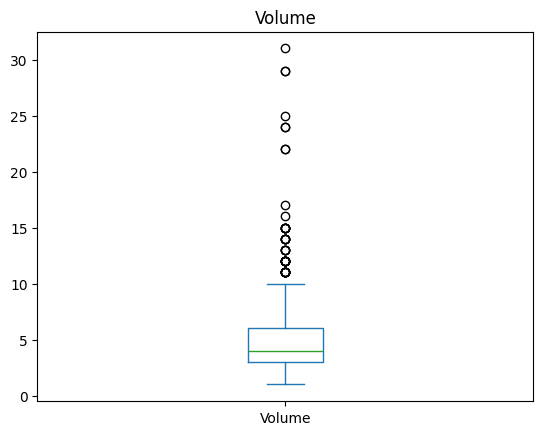

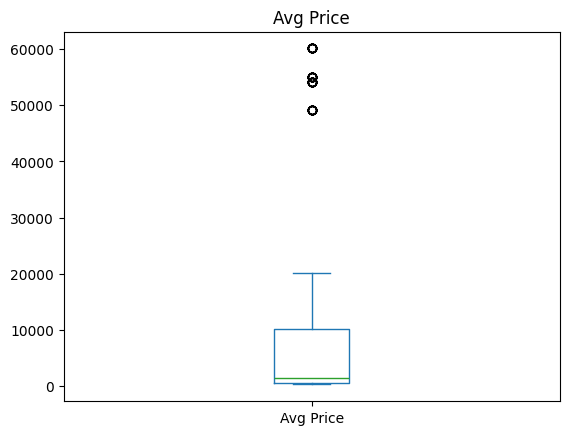

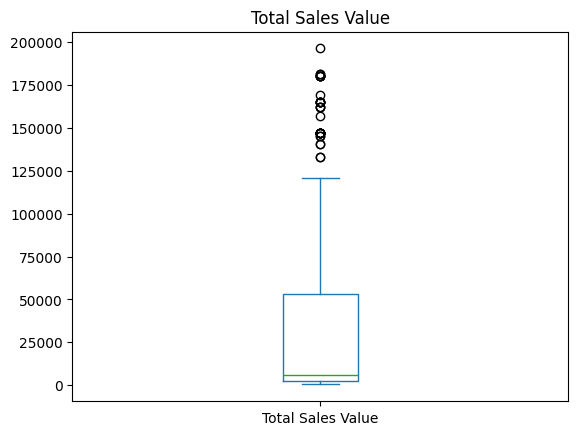

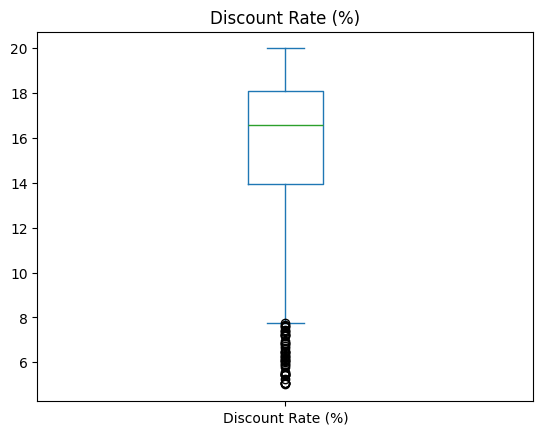

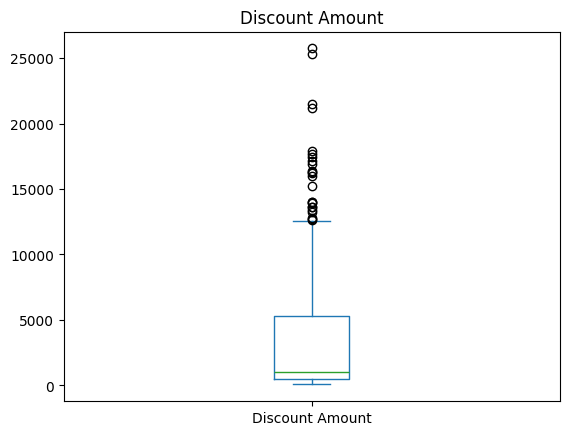

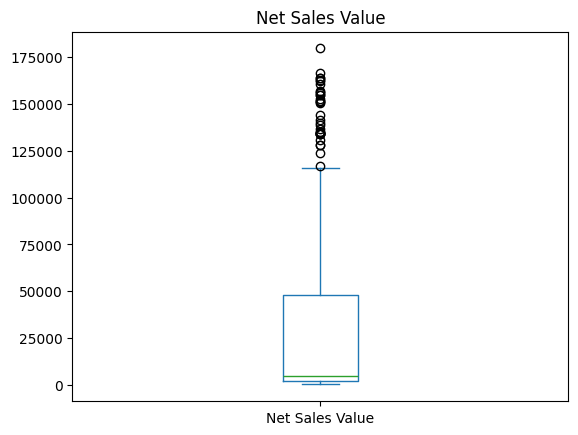

In [ ]:
for columns in numerical_columns:
    dt[columns].plot(kind='box',title=f'{columns}')
    plt.show()

 * Bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values(count or frequency) that they represent. The bars can be plotted vertically or horizontally. Bar graphs/charts provide a visual presentation of categorical data.
 * Categorical data is a grouping of data into discrete groups, such as months of the year, age group, shoe sizes, and animals. These categories are usually qualitative

In [ ]:
cat_columns = dt.select_dtypes(include = 'object').columns
print(cat_columns)

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


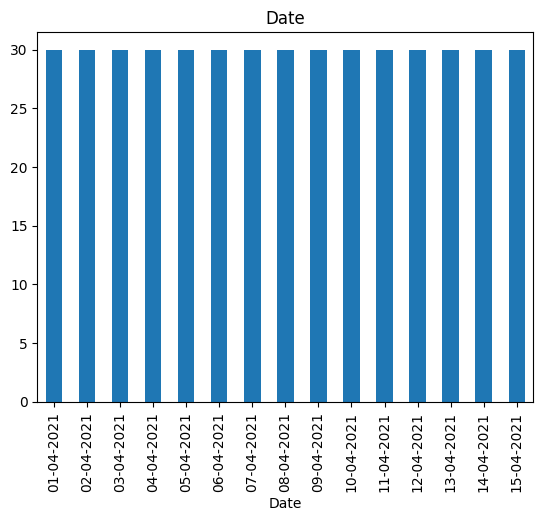

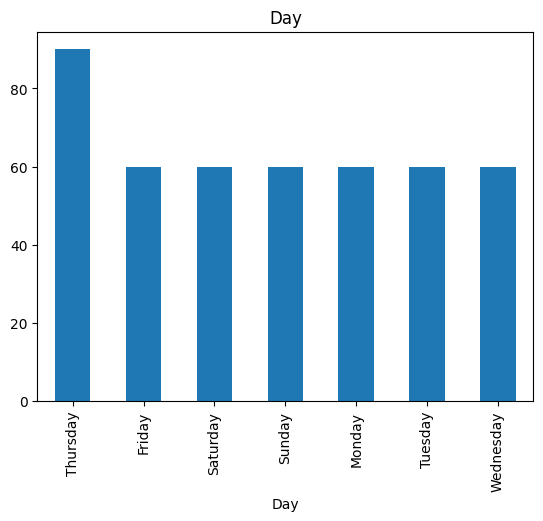

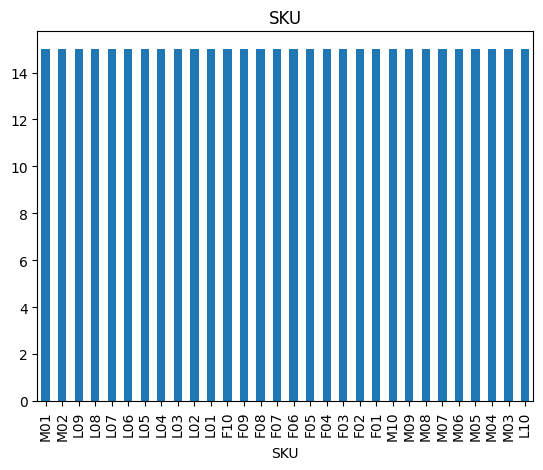

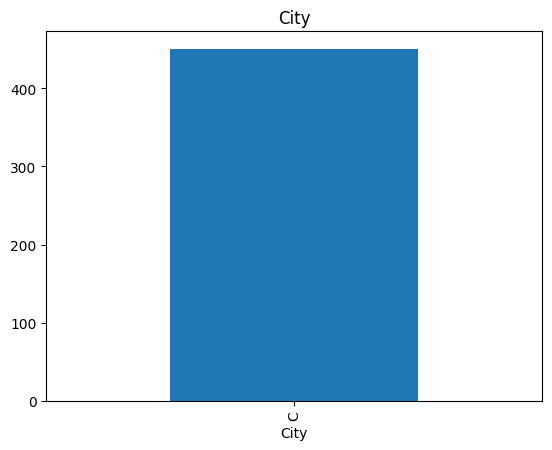

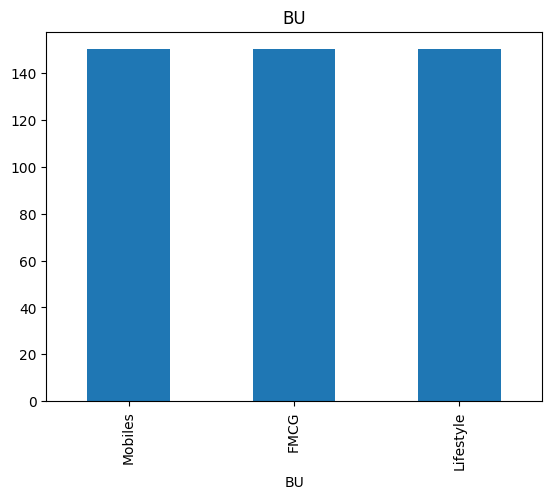

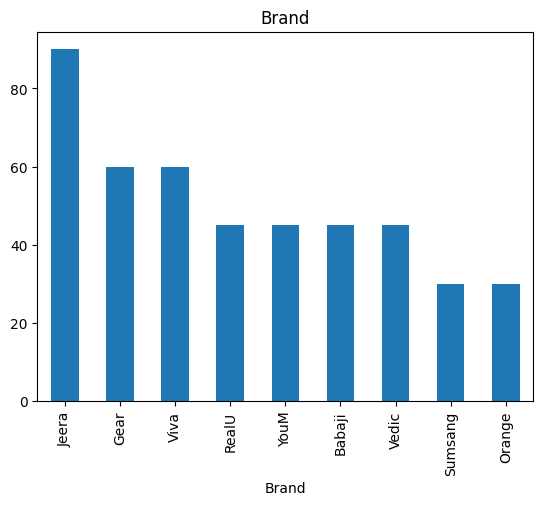

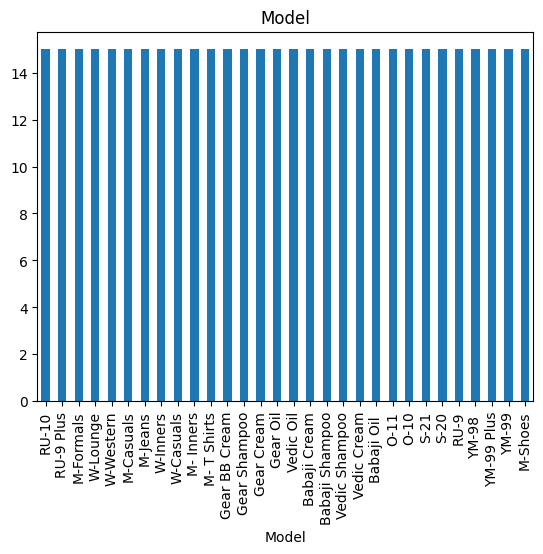

In [ ]:
for columns in cat_columns:
  dt[columns].value_counts().plot(kind='bar',title=f'{columns}')
  plt.show()


* A HISTOGRAM represents the distribution of numerical data by dividing the range into equal-sized intervals (bins) and showing the frequency of data within each bin through bar height.
* **A HISTOGRAM is a graphical representation of a grouped frequency distribution with continuous classes and A bar grapg is graphical representation of categorical frequency distribution.**
* BAR GRAPHS are used to compare different categories or groups of data. They are ideal for displaying discrete data, such as sales by region, survey results, or counts of various items, with each bar representing a specific category.
SO histigram is for continous data(numeric) and bar graph is for categorical data ------ remember  

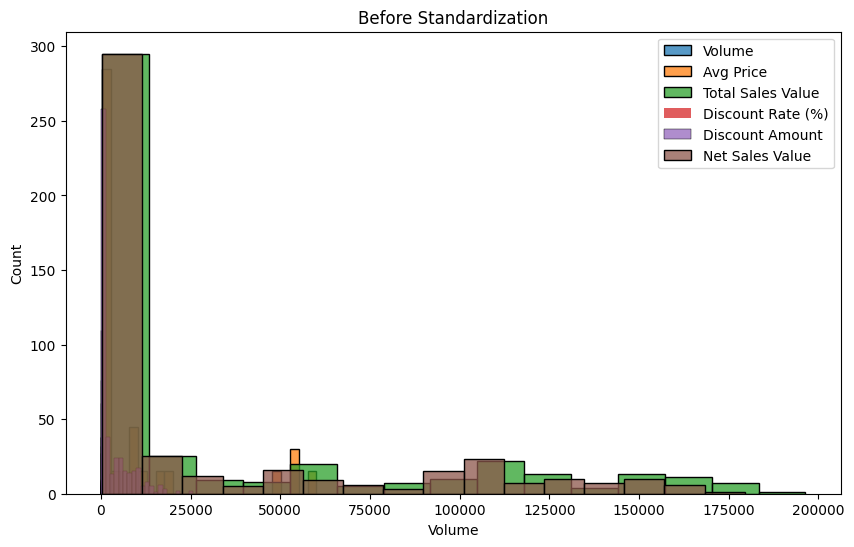

In [ ]:
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(10,6))
plt.title('Before Standardization')
for columns in numerical_columns:
    sns.histplot(dt[columns],label=columns)
plt.legend()
plt.show()




* label=columns tells Seaborn to use the current column name (columns) as the label for the histogram.
* plt.legend() will then use those labels to display the corresponding legend for each histogram.
* The plt.legend() function in Matplotlib is used to add a legend to your plot. A legend is a small box that explains the meaning of the various elements in the plot, such as lines, markers, or colors. It helps make the plot more understandable by providing context for the data being visualized. Those upper right side things are called as legends


In [ ]:
scaler=StandardScaler()
dt[numerical_columns]=scaler.fit_transform(dt[numerical_columns])
dt[numerical_columns]

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


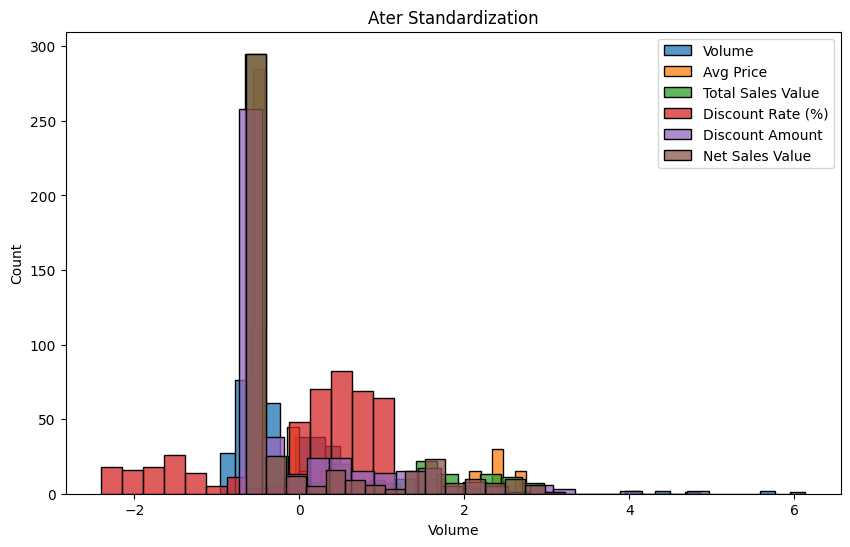

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Ater Standardization')
for columns in numerical_columns:
    sns.histplot(dt[columns],label=columns)
plt.legend()
plt.show()


CONVERSION OF CATEGORICAL DATA INTO DUMMY VARIABLES

In [ ]:

cat_columns=dt.select_dtypes(include=['object']).columns
cat_columns

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [ ]:
dt_dumm = pd.get_dummies(dt,columns = cat_columns,drop_first = True)
dt_dumm

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


* df: This is your original DataFrame.
* columns=categorical_columns: This specifies which columns in df you want to apply one-hot encoding to. The categorical_columns variable should be a list of column names that contain categorical data.
* drop_first=True: This drops the first category in each of the specified categorical columns. By doing this, it avoids the dummy variable trap, which happens when one category is linearly dependent on the others, potentially causing multicollinearity in machine learning models.